In [3]:
import pandas as pd
import numpy as np

df_sans_doublons = pd.read_csv('../dataSansDoublons.csv')
df_binaire = pd.read_csv('../dataBinaire.csv')
df_log_transforme = pd.read_csv('../dataLogTransforme.csv')

Sélection de 72 caractéristiques avec RFE-SVM:
['CertOpenStore', 'CoCreateInstance', 'CoCreateInstanceEx', 'CoGetClassObject', 'CreateActCtxW', 'CreateProcessInternalW', 'CreateThread', 'CreateToolhelp32Snapshot', 'CryptAcquireContextA', 'CryptDecodeObjectEx', 'DeviceIoControl', 'DrawTextExW', 'FindResourceExA', 'GetBestInterfaceEx', 'GetDiskFreeSpaceExW', 'GetFileInformationByHandle', 'GetFileSizeEx', 'GetFileType', 'GetFileVersionInfoSizeW', 'GetForegroundWindow', 'GetNativeSystemInfo', 'GetSystemTimeAsFileTime', 'GetTimeZoneInformation', 'GetUserNameExW', 'LdrGetDllHandle', 'LdrGetProcedureAddress', 'LdrUnloadDll', 'LookupPrivilegeValueW', 'NetShareEnum', 'NtClose', 'NtCreateFile', 'NtCreateMutant', 'NtDeviceIoControlFile', 'NtDuplicateObject', 'NtOpenDirectoryObject', 'NtOpenSection', 'NtProtectVirtualMemory', 'NtQueryAttributesFile', 'NtQueryInformationFile', 'NtQuerySystemInformation', 'NtReadFile', 'NtSetInformationFile', 'NtTerminateProcess', 'NtUnmapViewOfSection', 'OleInitial

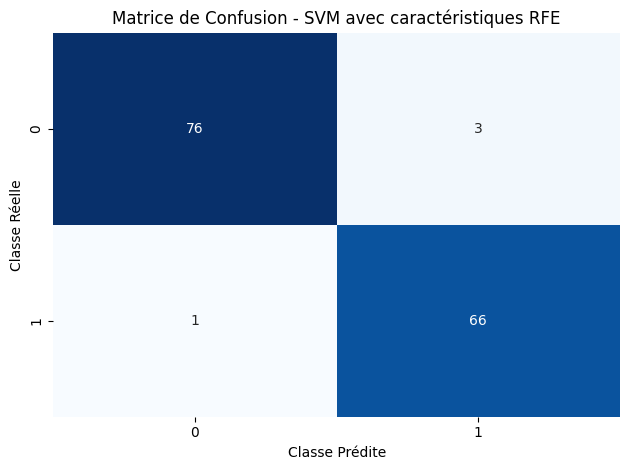

SVM avec caractéristiques RFE - Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        79
           1       0.96      0.99      0.97        67

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146

Accuracy: 0.9726027397260274
ROC AUC: 0.994898923105989


In [4]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Modèle SVM avec RFE
svm_model = SVC(kernel='linear', probability=True, random_state=42)
rfe = RFE(estimator=svm_model, n_features_to_select=72, step=1)

# Préparation des données
X = df_log_transforme.drop('Sample_Type', axis=1)
y = df_log_transforme['Sample_Type']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Entraînement RFE
rfe.fit(X_scaled_df, y)
selected_features = X.columns[rfe.support_]

print(f"Sélection de {len(selected_features)} caractéristiques avec RFE-SVM:")
print(selected_features.tolist())



# Modèle avec caractéristiques sélectionnées
X_selected_svm_rfe = X_scaled_df[selected_features]

# Séparation train/test
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_selected_svm_rfe, y, test_size=0.2, random_state=42)

# Entraînement modèle final
svm_final = SVC(kernel='linear', probability=True, random_state=42)
svm_final.fit(X_train_svm, y_train_svm)

# Prédictions et évaluation
y_pred_svm = svm_final.predict(X_test_svm)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)

# Tracer la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matrice de Confusion - SVM avec caractéristiques RFE')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.tight_layout()
plt.ylabel('Classe Réelle')
plt.xlabel('Classe Prédite')
plt.show()



print("SVM avec caractéristiques RFE - Rapport de classification:")
print(classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", svm_final.score(X_test_svm, y_test_svm))
print("ROC AUC:", roc_auc_score(y_test_svm, svm_final.predict_proba(X_test_svm)[:, 1]))


In [5]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test_svm, y_pred_svm)
print(f"Recall score: {recall:.4f}")

# If your classification is multi-class, you might want to see recall for each class
recall_per_class = classification_report(y_test_svm, y_pred_svm, output_dict=True)
for class_name, metrics in recall_per_class.items():
    if isinstance(metrics, dict) and 'recall' in metrics:
        print(f"Recall for class {class_name}: {metrics['recall']:.4f}")

Recall score: 0.9851
Recall for class 0: 0.9620
Recall for class 1: 0.9851
Recall for class macro avg: 0.9735
Recall for class weighted avg: 0.9726
